In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm

from IPython.core.pylabtools import figsize

figsize(10, 6)  

df = pd.read_csv("train.csv", na_values="?", dtype={"ID": str}).dropna().reset_index()

# df.head()

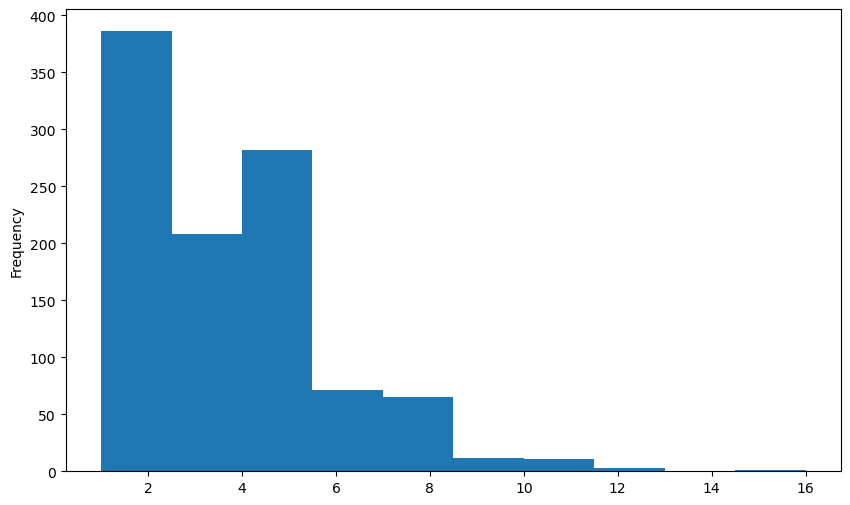

In [3]:
df['Number of female actors'].plot.hist()
plt.show()


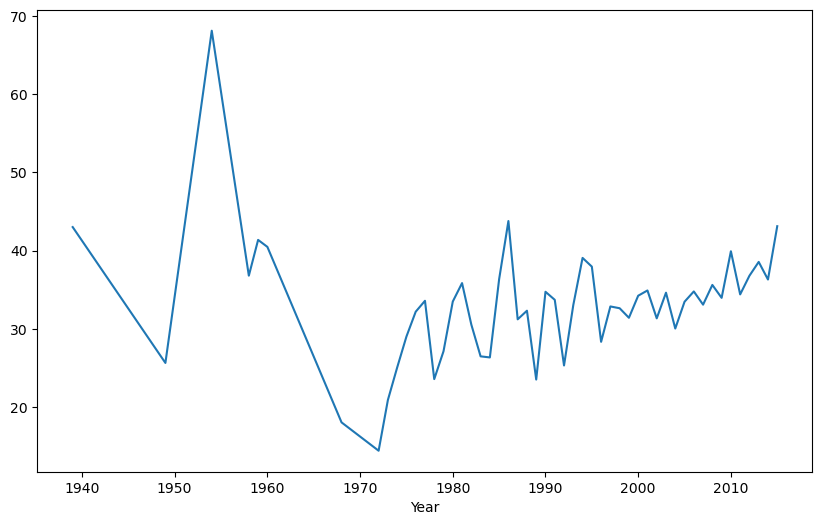

In [4]:
gender_percents = df.groupby('Year')[['Number words female', 'Number words male']].sum()
gender_percents['Percent female'] = gender_percents['Number words female'] / (gender_percents['Number words female'] + gender_percents['Number words male']) * 100
gender_percents['Percent female'].plot()
plt.show()


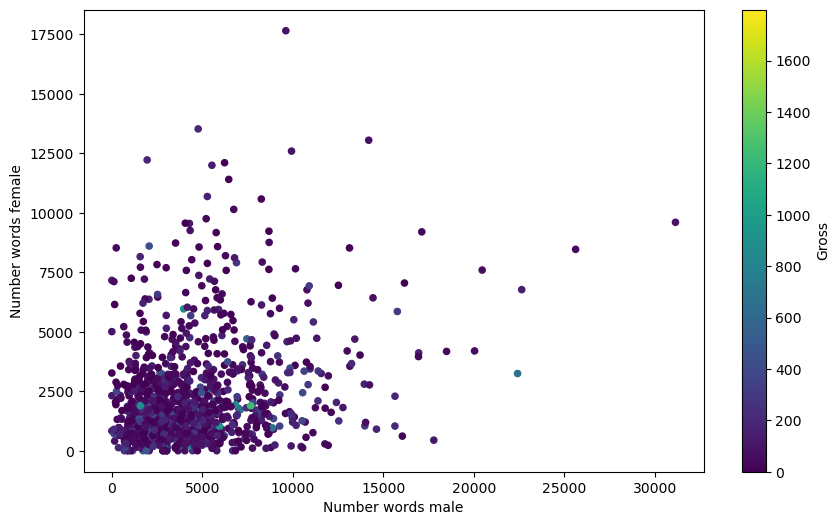

In [5]:
df.plot.scatter(x='Number words male', y='Number words female', c='Gross', colormap='viridis')
plt.show()
